# Financial Data Analysis
Benjamin Smith 10/23/20

The first step to analyze the data set provided was to import the financial.db file into a data frame for each of the eight tables in the database. Doing so will start to identify how tables are related and help to understand the Guide to the data set. 

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("./desktop/utk/dse511/financial.db")

In [2]:
#Account
df = pd.read_sql_query("SELECT * from account ORDER by account_id", conn)
print(df);

      account_id  district_id         frequency        date
0              1           18  POPLATEK MESICNE  1995-03-24
1              2            1  POPLATEK MESICNE  1993-02-26
2              3            5  POPLATEK MESICNE  1997-07-07
3              4           12  POPLATEK MESICNE  1996-02-21
4              5           15  POPLATEK MESICNE  1997-05-30
...          ...          ...               ...         ...
4495       11333            8  POPLATEK MESICNE  1994-05-26
4496       11349            1    POPLATEK TYDNE  1995-05-26
4497       11359           61  POPLATEK MESICNE  1994-10-01
4498       11362           67  POPLATEK MESICNE  1995-10-14
4499       11382           74  POPLATEK MESICNE  1995-08-20

[4500 rows x 4 columns]


In [3]:
#Client
df = pd.read_sql_query("SELECT * from client", conn)
print(df);

      client_id gender  birth_date  district_id
0             1      F  1970-12-13           18
1             2      M  1945-02-04            1
2             3      F  1940-10-09            1
3             4      M  1956-12-01            5
4             5      F  1960-07-03            5
...         ...    ...         ...          ...
5364      13955      F  1945-10-30            1
5365      13956      M  1943-04-06            1
5366      13968      M  1968-04-13           61
5367      13971      F  1962-10-19           67
5368      13998      F  1953-08-12           74

[5369 rows x 4 columns]


In [4]:
#Disposition
df = pd.read_sql_query("SELECT * from disp", conn)
print(df);

      disp_id  client_id  account_id       type
0           1          1           1      OWNER
1           2          2           2      OWNER
2           3          3           2  DISPONENT
3           4          4           3      OWNER
4           5          5           3  DISPONENT
...       ...        ...         ...        ...
5364    13647      13955       11349      OWNER
5365    13648      13956       11349  DISPONENT
5366    13660      13968       11359      OWNER
5367    13663      13971       11362      OWNER
5368    13690      13998       11382      OWNER

[5369 rows x 4 columns]


The first three tables are related as described in the Guide. These dataframes confirm how the desposition data table (disp) is a combination of the client and account information. Each account can have multiple clients associated but only one loan and district_id.

In [5]:
#Credit Card
df = pd.read_sql_query("SELECT * from card", conn)
print(df);

     card_id  disp_id     type      issued
0          1        9     gold  1998-10-16
1          2       19  classic  1998-03-13
2          3       41     gold  1995-09-03
3          4       42  classic  1998-11-26
4          5       51   junior  1995-04-24
..       ...      ...      ...         ...
887     1230    13312  classic  1998-03-08
888     1233    13382  classic  1996-07-06
889     1234    13386  classic  1997-11-28
890     1239    13442   junior  1998-02-02
891     1247    13660  classic  1995-06-13

[892 rows x 4 columns]


In [6]:
#Loan
df = pd.read_sql_query("SELECT * from loan", conn)
print(df);

     loan_id  account_id        date  amount  duration  payments status
0       4959           2  1994-01-05   80952        24      3373      A
1       4961          19  1996-04-29   30276        12      2523      B
2       4962          25  1997-12-08   30276        12      2523      A
3       4967          37  1998-10-14  318480        60      5308      D
4       4968          38  1998-04-19  110736        48      2307      C
..       ...         ...         ...     ...       ...       ...    ...
677     7294       11327  1998-09-27   39168        24      1632      C
678     7295       11328  1998-07-18  280440        60      4674      C
679     7304       11349  1995-10-29  419880        60      6998      C
680     7305       11359  1996-08-06   54024        12      4502      A
681     7308       11362  1996-12-27  129408        24      5392      A

[682 rows x 7 columns]


These two tables describe if a particular account has a loan or if a particular client has a credit card. The different titles indicate the diference in the association with a loan vs credit card as a loan goes to an account while a credit card goes ultimately to an individual client. These two services each have a sort of rating system with the credit card type and loan status which we can use to differientate the clients quality. 

In [7]:
#Ordered Payments
df = pd.read_sql_query("SELECT * from 'order'", conn)
print(df);

      order_id  account_id bank_to  account_to  amount  k_symbol
0        29401           1      YZ    87144583  2452.0      SIPO
1        29402           2      ST    89597016  3372.7      UVER
2        29403           2      QR    13943797  7266.0      SIPO
3        29404           3      WX    83084338  1135.0      SIPO
4        29405           3      CD    24485939   327.0          
...        ...         ...     ...         ...     ...       ...
6466     46334       11362      YZ    70641225  4780.0      SIPO
6467     46335       11362      MN    78507822    56.0          
6468     46336       11362      ST    40799850   330.0  POJISTNE
6469     46337       11362      KL    20009470   129.0          
6470     46338       11362      MN    61540514  5392.0      UVER

[6471 rows x 6 columns]


In [8]:
#Transactions
df = pd.read_sql_query("SELECT * from trans", conn)
print(df);

         trans_id  account_id        date    type      operation  amount  \
0               1           1  1995-03-24  PRIJEM          VKLAD    1000   
1               5           1  1995-04-13  PRIJEM  PREVOD Z UCTU    3679   
2               6           1  1995-05-13  PRIJEM  PREVOD Z UCTU    3679   
3               7           1  1995-06-13  PRIJEM  PREVOD Z UCTU    3679   
4               8           1  1995-07-13  PRIJEM  PREVOD Z UCTU    3679   
...           ...         ...         ...     ...            ...     ...   
1056315   3682983       10451  1998-08-31  PRIJEM           None      62   
1056316   3682984       10451  1998-09-30  PRIJEM           None      49   
1056317   3682985       10451  1998-10-31  PRIJEM           None      34   
1056318   3682986       10451  1998-11-30  PRIJEM           None      26   
1056319   3682987       10451  1998-12-31  PRIJEM           None      42   

         balance k_symbol  bank     account  
0           1000     None  None         N

These two preceding dataframes provide infomation of all transactions and ordered payments of each of the accounts in the database. Obviously, these are the largest tables because each account can have many transactions and payments.

In [9]:
#Disctrict Demographics
df = pd.read_sql_query("SELECT * from district ORDER by A4 DESC", conn)
print(df);

    district_id               A2               A3       A4  A5  A6  A7  A8  \
0             1      Hl.m. Praha           Prague  1204953   0   0   0   1   
1            54     Brno - mesto    south Moravia   387570   0   0   0   1   
2            74  Ostrava - mesto    north Moravia   323870   0   0   0   1   
3            70          Karvina    north Moravia   285387   0   2   8   5   
4            68  Frydek - Mistek    north Moravia   228848  15  40  18   2   
..          ...              ...              ...      ...  ..  ..  ..  ..   
72           13         Rakovnik  central Bohemia    53921  61  22   1   1   
73           19       Prachatice    south Bohemia    51428  50  11   3   1   
74           31           Tachov     west Bohemia    51313  34  12   3   1   
75           29         Rokycany     west Bohemia    45714  52  10   5   1   
76           69          Jesenik    north Moravia    42821   4  13   5   1   

    A9    A10    A11  A12   A13  A14      A15    A16  
0    1  

Here is a description of the demographics of the 77 disctricts which these clients live. We can use this data to see which areas are more wealthy to segment the clients while knowing the standards of living in each district. The first step of analysis will be to indentify some problematic disctricts to see if the demographics translate to poor clients.

In [10]:
#Selected average district info
query = "SELECT AVG(A11) as Salary, AVG(A12)as AvgUNE95, AVG(A13) as AvgUNE96 FROM district"
df = pd.read_sql_query(query,conn)
print(df);

        Salary  AvgUNE95  AvgUNE96
0  9031.675325  3.072368  3.787013


We can quickly find the average salary, and rate of unemployment for each of the two years provided from the 77 districts.

In [11]:
#Districts below average 
query = "SELECT district_id, A4 as Population FROM district WHERE (A11<9031.675) AND (A12>3.072) AND (A13>3.787)"
df = pd.read_sql_query(query,conn)
print(df);

    district_id  Population
0             9       81344
1            12      107870
2            19       51428
3            31       51313
4            33      133777
5            38       85852
6            50      102609
7            56      124605
8            57      161954
9            58      109164
10           60      110643
11           61      117897
12           63       86513
13           65      114200
14           66      125832
15           67      106054
16           71      161227
17           72      226122
18           75      138032
19           76      127369
20           77      148545


Using the district info we can find the districts which have lower than average salary and higher rates of unemployment for both years. One may expect that these districts dispropotionately represent clients that have had issues with the bank and where caution may be excercised in evaluating future clients.

In [12]:
#Counting loan status
A = pd.read_sql_query("SELECT COUNT(*) FROM loan WHERE status='A' ", conn)
B = pd.read_sql_query("SELECT COUNT(*) FROM loan WHERE status='B' ", conn)
C = pd.read_sql_query("SELECT COUNT(*) FROM loan WHERE status='C' ", conn)
D = pd.read_sql_query("SELECT COUNT(*) FROM loan WHERE status='D' ", conn)
LoanStatus = [A, B, C, D]
result = pd.concat(LoanStatus)
print(result);

   COUNT(*)
0       203
0        31
0       403
0        45


Here, we simply counted how many loans we in each status. We see that 76 are in an unfavorable status.

In [13]:
#Selecting accounts with bad loans
df = pd.read_sql_query("SELECT account_id FROM loan WHERE (status='B') OR (status='D') ", conn)
print(df);

    account_id
0           19
1           37
2          103
3          347
4          426
..         ...
71       10266
72       10365
73       10451
74       10857
75       11021

[76 rows x 1 columns]


The first dataframe represents the freqency of each loan status (A-D) and the second shows the 76 accounts which are associated with a unfavorable status with the bank (B and D). The number of rows in the second confirms the count in the previous dataframe.

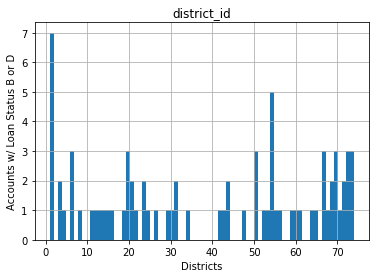

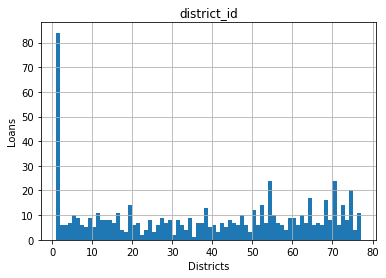

In [14]:
#Merge loan and account table
df1 = pd.read_sql_query("SELECT * from loan", conn)
df2 = pd.read_sql_query("SELECT * from account", conn)
df1 = pd.merge(df1, df2, on='account_id')
#print(df1);  

statusBD = df1[df1["status"].isin(['B','D'])]
maybe = statusBD[["account_id", "district_id"]] #Creating dataframe of just relevant columns 
hist = maybe.hist(column="district_id", bins=76) 
for ax in hist.flatten():
    ax.set_xlabel("Districts")
    ax.set_ylabel("Accounts w/ Loan Status B or D")   
#print(maybe); 

place = df1[["account_id", "district_id"]] #New dataframe for all loans
hist = place.hist(column="district_id", bins = 76)
for ax in hist.flatten():
    ax.set_xlabel("Districts")
    ax.set_ylabel("Loans")
#print(place);

These histograms represent the districts by the number of loans issued by the bank and how many of those are in a 'bad status. The data was combined from the loan and the account table by the account_id column. This reveals that district 1, which represents Prague, clearly has the most loans and therefore the high number of bad loans makes sense. This direct relationship is also seen with district 54 and some of those around 70. It does however, identify some spikes in bad loans where we do not have a large amount of loans awarded. Lets compare this to the list of districts that have poor salary and unemployment. District 19, 31, 50, and 67 were all part of the 20 districts below average shown previously and had more than one loan in an unfavorable status. Ultimately, there is a correlation between the standard of living for the district an account resides in and their likelihood to default on a loan. However, there really are not enough loans given to each district to prove this completely. You can also reduce the number bins in each of the histograms, and assuming that the district are located close to eachother geographically make more general statements about loan success by larger regions. 

   AVG(balance)
0  38518.379134


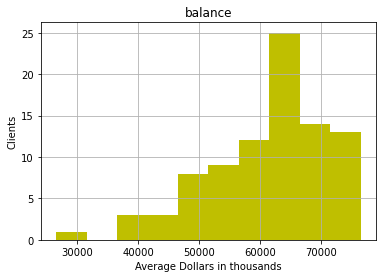

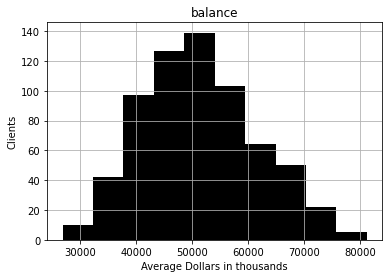

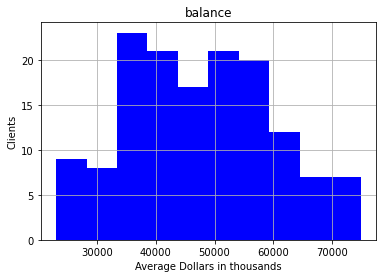

In [15]:
#Finding the account balance by credit card type
df1 = pd.read_sql_query("SELECT * from card", conn) #merge card and desposition tables
df2 = pd.read_sql_query("SELECT * from disp", conn)
combined = pd.merge(df1, df2, on='disp_id') 
#print(combined);
gold = combined[combined["type_x"].isin(['gold'])]  #sort the combined table by card type
junior = combined[combined["type_x"].isin(['junior'])]
classic = combined[combined["type_x"].isin(['classic'])]

gaccounts = gold[["account_id"]]  #just get relevant column
jaccounts = junior[["account_id"]]
caccounts = classic[["account_id"]]

#print(gaccounts);
df3 = pd.read_sql_query("SELECT balance, account_id from trans", conn)

new = pd.merge(gaccounts, df3, on='account_id')  #sorts the trans table by account_id
jnew = pd.merge(jaccounts, df3, on='account_id')
cnew = pd.merge(caccounts, df3, on='account_id')
#print(new);

avg = new.groupby('account_id').mean('balance') #groups transactions by account and finds average balance for each
javg = jnew.groupby('account_id').mean('balance')
cavg = cnew.groupby('account_id').mean('balance')

hist = avg.hist(color = 'y') #plot
for ax in hist.flatten():
    ax.set_xlabel("Average Dollars in thousands")
    ax.set_ylabel("Clients")
hist = cavg.hist(color = 'k')
for ax in hist.flatten():
    ax.set_xlabel("Average Dollars in thousands")
    ax.set_ylabel("Clients")
hist = javg.hist(color = 'b')
for ax in hist.flatten():
    ax.set_xlabel("Average Dollars in thousands")
    ax.set_ylabel("Clients")

allavg = pd.read_sql_query("SELECT AVG(balance) from trans", conn)
print(allavg);

These three histograms show the distributions of the aveage account balances for those with a credit card seperated by  card type. The gold type shown first is distributed more at higher balances, which makes total sense. This is what we expect and shows that we are probably giving these cards to the right people. Notably, there are many more people with classic credit cards than any other type. This is why we see our average account balance around $38500. The bank may want to use the clients with high account balances and figure out where they live so they can allocate more resources to keep those high value clients happy. It also identifies areas where they can look for new favorable clients.

# Discussion

With the amount of information available through these eight tables there are endless ways of approaching analysis of the client data. So far I have shown what's in each table and how they relate to eachother. Some of the districts struggling economically were identified and related that to the location of the loans that had problems with the bank. The credit cards offered allowed us to compare some of the accounts by their average balance as well. If I were the bank and wanted to improve profits my next step would be to look at the rate of enterpreneurs given by district. This would reveal what areas are actively developing and one could compare that with the loans already given out by the bank. If an area has a high amount of enterpreneurship, but our bank has not given out loans there, why is that? What can we do to capitalize on business seeking loans to increase profits. This way the bank can pick where to focus their marketing resources for credit options. There are other ways we can analyze the data to detect good and bad clients and influence decision making, but this is one way to start to categorize the clients. 